In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

In [2]:
import pandas as pd
import numpy as np

churn_df= pd.read_csv('Bank+Customer+Churn/churn_df.csv',index_col=False)

In [3]:
# Segmentation Start

In [4]:
#Keep a subset of the data
#createa a pandas dataframe containing all exctep customerid surname and exited
#

In [5]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  float64
 6   Tenure           10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1015.8+ KB


In [6]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
3,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [7]:
data_subset = churn_df[['CreditScore','Geography',
                            'Gender','Age','Tenure','Balance','NumOfProducts',
                            'HasCrCard','IsActiveMember','EstimatedSalary']]

data_subset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,Yes,Yes,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,Yes,Yes,112542.58
2,502,France,Female,42.0,8,159660.80,3,No,No,113931.57
3,699,France,Female,39.0,1,0.00,2,No,No,93826.63
4,850,Spain,Female,43.0,2,125510.82,1,Yes,Yes,79084.10


In [8]:
data_subset["HasCrCard"] = data_subset["HasCrCard"].map({"Yes": 1, "No": 0})
data_subset["IsActiveMember"] = data_subset["IsActiveMember"].map({"Yes": 1, "No": 0})


C:\Users\icero\AppData\Local\Temp\ipykernel_17588\495015610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["HasCrCard"] = data_subset["HasCrCard"].map({"Yes": 1, "No": 0})
C:\Users\icero\AppData\Local\Temp\ipykernel_17588\495015610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset["IsActiveMember"] = data_subset["IsActiveMember"].map({"Yes": 1, "No": 0})


In [9]:
data_clean = data_subset.copy()

In [10]:
data_clean.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
data_clean.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [12]:
data_clean.Gender = np.where(data_clean.Gender == 'Female',1,0)

In [13]:
data_clean.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42.0,2,0.00,1,1,1,101348.88
1,608,Spain,1,41.0,1,83807.86,1,1,1,112542.58
2,502,France,1,42.0,8,159660.80,3,0,0,113931.57
3,699,France,1,39.0,1,0.00,2,0,0,93826.63
4,850,Spain,1,43.0,2,125510.82,1,1,1,79084.10


In [14]:
data_clean = pd.get_dummies(
    data_clean, 
    columns=['Geography'],  # Removed invisible tab
    dtype='int', 
    prefix='', 
    prefix_sep=''
)

In [15]:
data_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42.0,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41.0,1,83807.86,1,1,1,112542.58,0,0,1
2,502,1,42.0,8,159660.80,3,0,0,113931.57,1,0,0
3,699,1,39.0,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43.0,2,125510.82,1,1,1,79084.10,0,0,1


In [16]:
data_clean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921500,5.012800,76485.889288,1.530200,0.515100,0.515100,100092.252506,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487552,2.892174,62397.405202,0.581654,0.499797,0.499797,57510.146401,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100196.062500,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000


C:\Users\icero\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


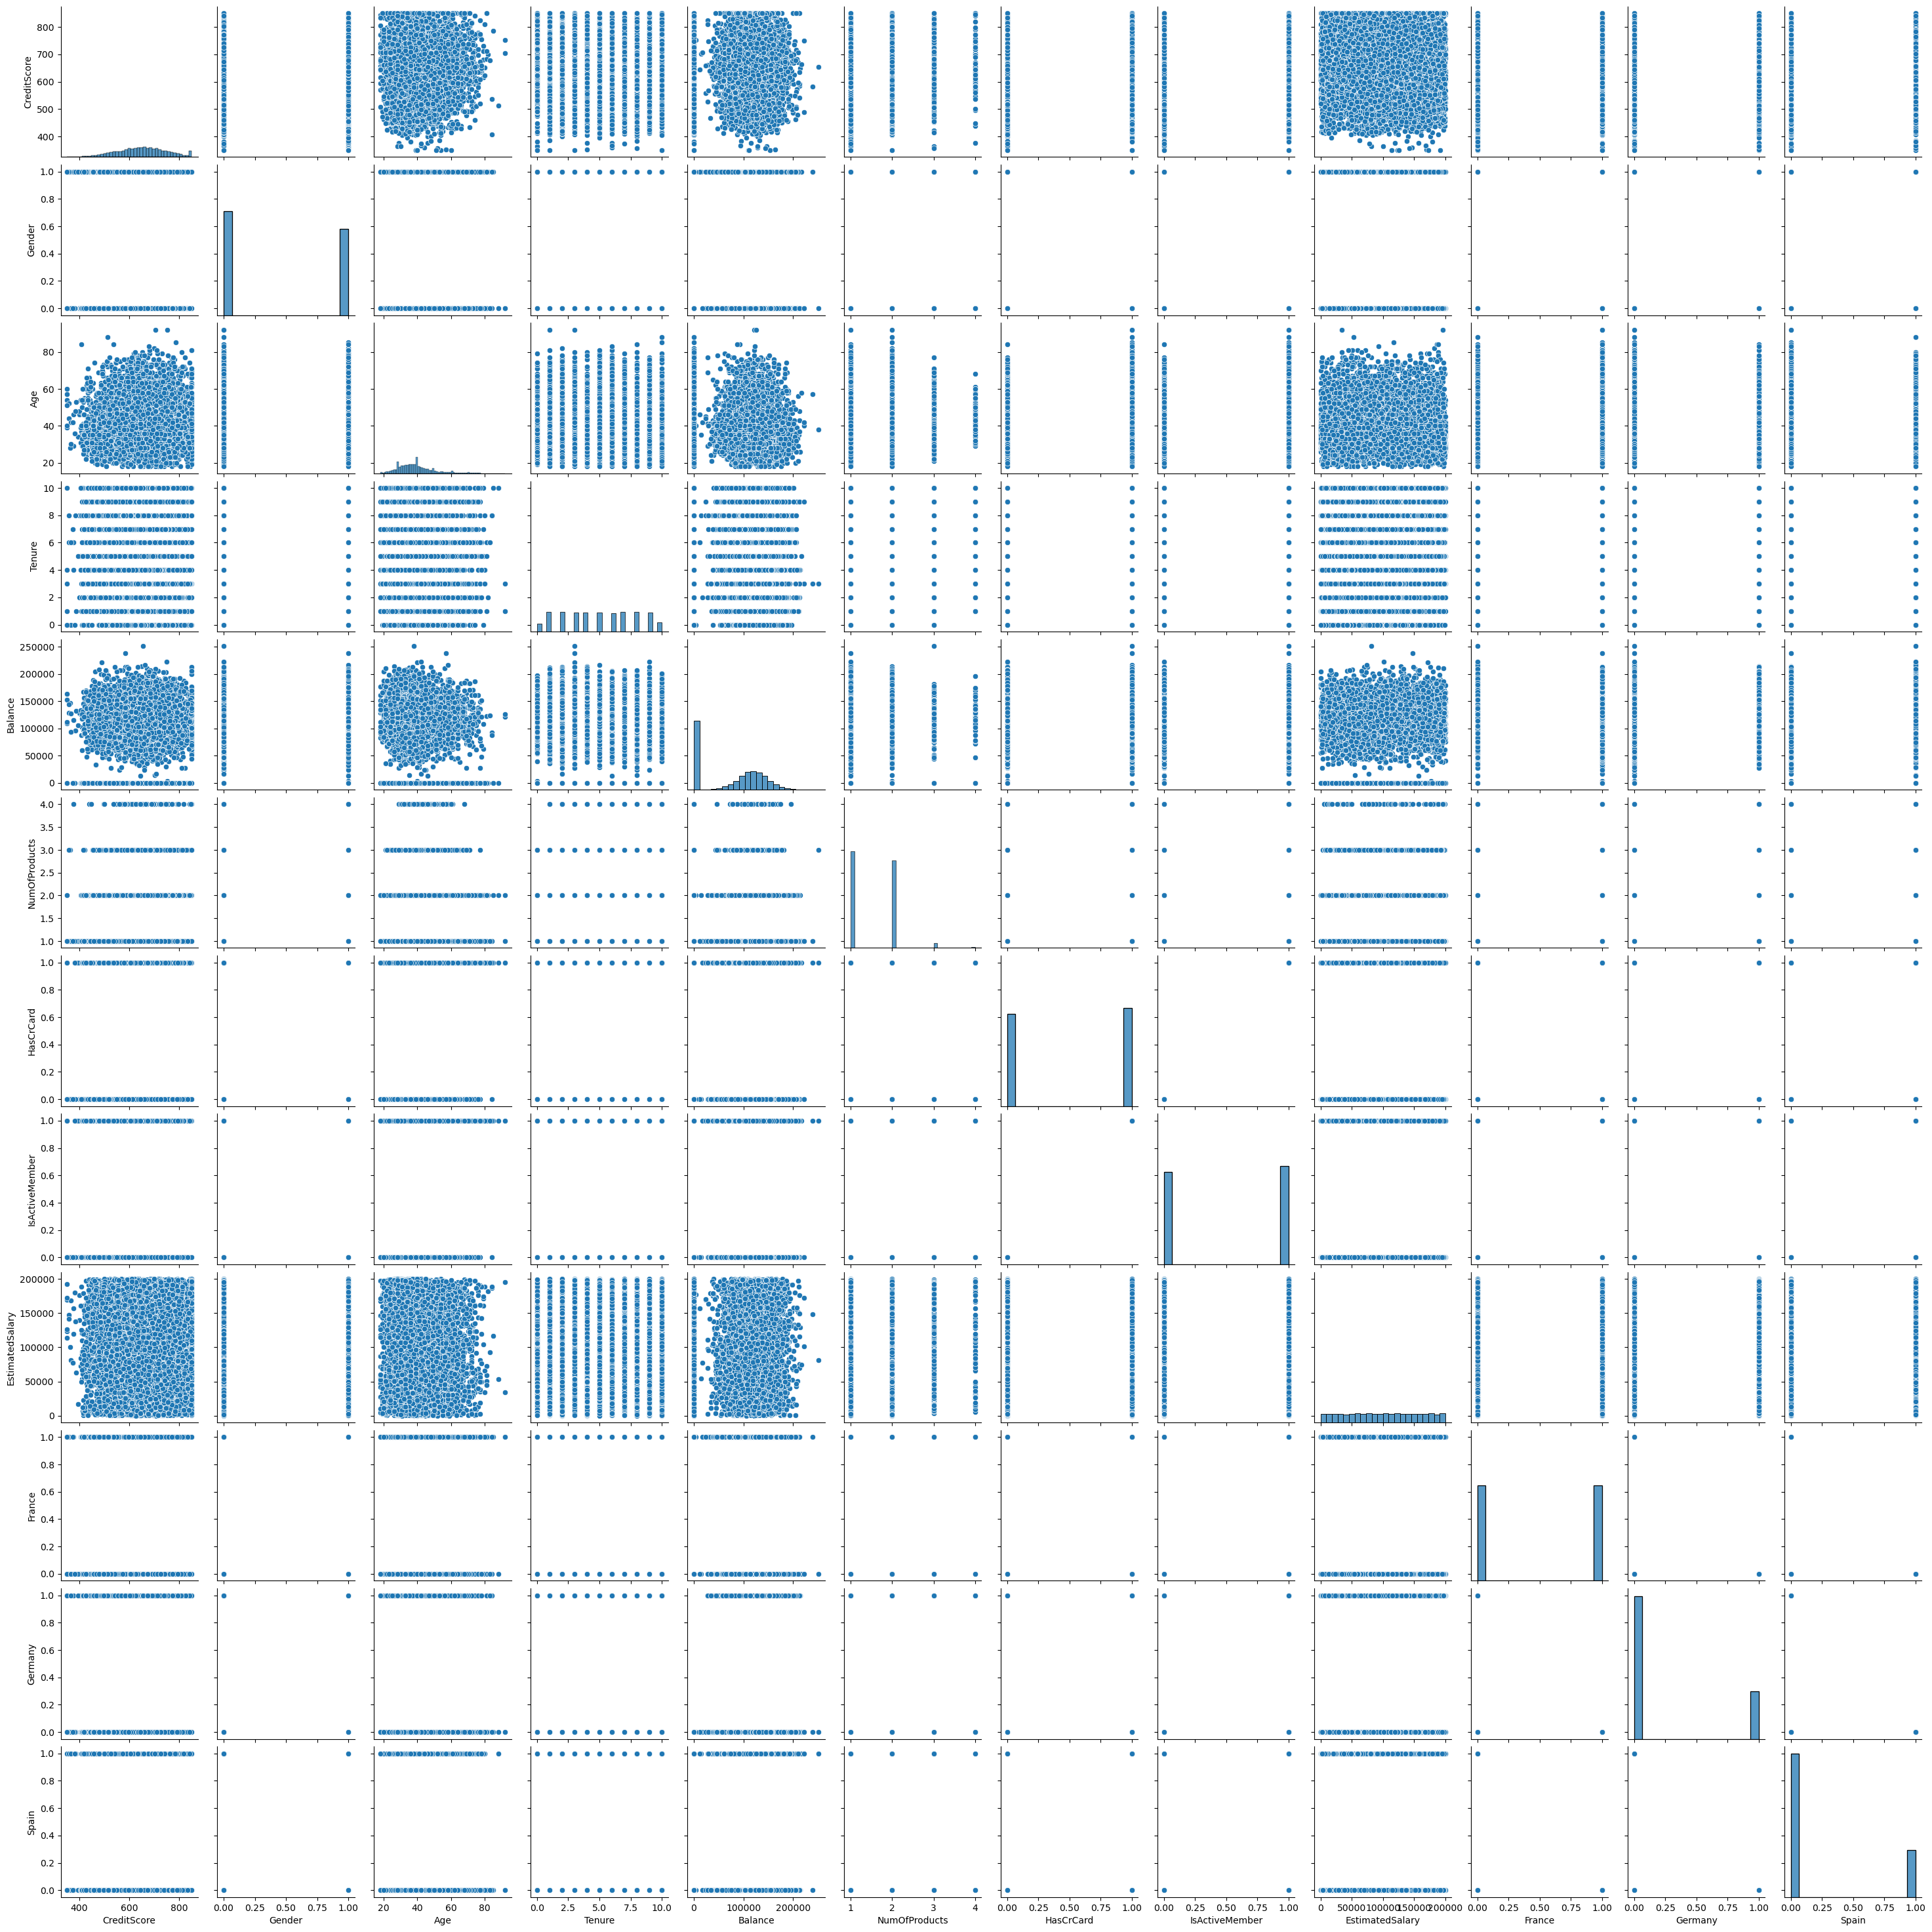

In [17]:
import seaborn as sns

sns.pairplot(data_clean);

In [18]:
#data_clean['ProductsPerYear']=data_clean.NumOfProducts /data_clean.Tenure  
#but we gotta deal with tenure =0

data_clean['ProductsPerYear']=np.where(data_clean.Tenure==0, data_clean.NumOfProducts,
        data_clean.NumOfProducts /data_clean.Tenure)


data_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42.0,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41.0,1,83807.86,1,1,1,112542.58,0,0,1,1.000
2,502,1,42.0,8,159660.80,3,0,0,113931.57,1,0,0,0.375
3,699,1,39.0,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [19]:
data_clean.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921500,5.012800,76485.889288,1.530200,0.515100,0.515100,100092.252506,0.501400,0.250900,0.247700,0.508523
std,96.653299,0.497932,10.487552,2.892174,62397.405202,0.581654,0.499797,0.499797,57510.146401,0.500023,0.433553,0.431698,0.507921
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,0.000000,0.100000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.200000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100196.062500,1.000000,0.000000,0.000000,0.333333
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,1.000000,1.000000,0.000000,0.666667
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,1.000000,4.000000


In [20]:
#Objective 2 CLuster data

In [21]:
#1 scale the data using standardization\

#2 Fit K-Means models with 2-15 clusters

#3 Plot the inertia values and find the elbow

#4 Check the number of customers in each cluster

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit_transform(data_clean)

array([[-0.32622142,  1.09598752,  0.29355316, ..., -0.57873591,
        -0.57380915, -0.01678066],
       [-0.44003595,  1.09598752,  0.19819726, ..., -0.57873591,
         1.74273971,  0.96767412],
       [-1.53679418,  1.09598752,  0.29355316, ..., -0.57873591,
        -0.57380915, -0.26289435],
       ...,
       [ 0.60498839,  1.09598752, -0.27858229, ..., -0.57873591,
        -0.57380915, -0.71996264],
       [ 1.25683526, -0.91241915,  0.29355316, ...,  1.72790383,
        -0.57380915,  0.31137094],
       [ 1.46377078,  1.09598752, -1.04142956, ..., -0.57873591,
        -0.57380915, -0.50900805]])

In [23]:
df_scaled = pd.DataFrame(scaler.fit_transform(data_clean),columns=data_clean.columns)
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293553,-1.041760,-1.225848,-0.911583,0.970243,0.970243,0.021852,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198197,-1.387538,0.117350,-0.911583,0.970243,0.970243,0.216500,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293553,1.032908,1.333053,2.527057,-1.030670,-1.030670,0.240653,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007485,-1.387538,-1.225848,0.807737,-1.030670,-1.030670,-0.108954,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388909,-1.041760,0.785728,-0.911583,0.970243,0.970243,-0.365313,-1.002804,-0.578736,1.742740,-0.016781


In [24]:
df_scaled.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.824585e-16,-2.131628e-18,-1.470823e-16,-1.078249e-16,-6.252776e-17,1.634248e-17,-7.389644e-17,-7.389644e-17,1.092459e-16,2.096101e-17,-7.069900e-17,-4.689582e-17,1.957545e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-9.124191e-01,-1.994989e+00,-1.733315e+00,-1.225848e+00,-9.115835e-01,-1.030670e+00,-1.030670e+00,-1.740313e+00,-1.002804e+00,-5.787359e-01,-5.738092e-01,-8.043445e-01
25%,-6.883586e-01,-9.124191e-01,-6.600059e-01,-6.959818e-01,-1.225848e+00,-9.115835e-01,-1.030670e+00,-1.030670e+00,-8.536337e-01,-1.002804e+00,-5.787359e-01,-5.738092e-01,-6.074535e-01
50%,1.522218e-02,-9.124191e-01,-1.832264e-01,-4.425957e-03,3.319639e-01,-9.115835e-01,9.702426e-01,9.702426e-01,1.805163e-03,9.972039e-01,-5.787359e-01,-5.738092e-01,-3.449322e-01
75%,6.981094e-01,1.095988e+00,4.842650e-01,6.871299e-01,8.199205e-01,8.077366e-01,9.702426e-01,9.702426e-01,8.572133e-01,9.972039e-01,1.727904e+00,-5.738092e-01,3.113709e-01
max,2.063884e+00,1.095988e+00,5.061349e+00,1.724464e+00,2.795323e+00,4.246377e+00,9.702426e-01,9.702426e-01,1.737176e+00,9.972039e-01,1.727904e+00,1.742740e+00,6.874403e+00


In [25]:
#now the data is scaled and standardized and ready to be put into a model

In [26]:
# import os
# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"

In [27]:
# Import KMeans and silhouette_score
from sklearn.cluster import KMeans  # Corrected import (uppercase K)
from sklearn.metrics import silhouette_score

# Create empty lists to hold inertia and silhouette values
inertia_values = []
silhouette_scores = []

# Create clusters ranging from 2 to 15 and store inertia and silhouette scores
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Corrected "kMeans" to "KMeans"
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric='euclidean'))

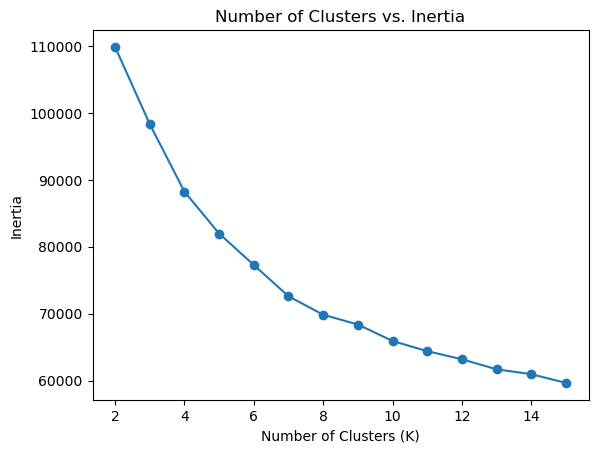

In [28]:
#plot the inertia values
import matplotlib.pyplot as plt

#turn the list into a series for plotting
inertia_series = pd.Series(inertia_values,index=range(2,16))

#plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [29]:
#i neeed to find an elbow of this plot
#so plot drops significantly and then flattens from 5
#so we take k=5

In [30]:
# Create and fit the model with 5 clusters
Kmeans5 = KMeans(n_clusters=5, n_init=10, random_state=42)
Kmeans5.fit(df_scaled)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [31]:
from collections import Counter

Counter(Kmeans5.labels_)

Counter({4: 2392, 3: 2336, 2: 2329, 1: 2257, 0: 686})

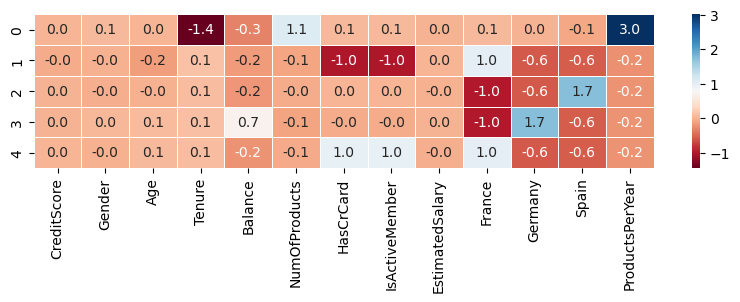

In [32]:
#create a heat map of the cluster centres
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers5 = pd.DataFrame(Kmeans5.cluster_centers_,columns=df_scaled.columns)

plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers5,annot=True,cmap="RdBu",fmt=".1f",linewidths=.5);

In [33]:
#objective 3 cluster the customers round 2

In [34]:
#take a look at summary stats by geography
#fit K -Means models with 2-15 clusters
#Plot the inertia values and find the elbow
#check the number of customers in each cluster
#create a heath map

In [35]:
data_subset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41.0,1,83807.86,1,1,1,112542.58
2,502,France,Female,42.0,8,159660.80,3,0,0,113931.57
3,699,France,Female,39.0,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10


In [36]:
data_geo = data_subset.copy()

data_geo.Gender = np.where(data_geo.Gender == 'Female',1,0)

data_geo.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,1,42.0,2,0.00,1,1,1,101348.88
1,608,Spain,1,41.0,1,83807.86,1,1,1,112542.58
2,502,France,1,42.0,8,159660.80,3,0,0,113931.57
3,699,France,1,39.0,1,0.00,2,0,0,93826.63
4,850,Spain,1,43.0,2,125510.82,1,1,1,79084.10


In [37]:
data_geo.groupby('Geography').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Geography,,,,,,,,,
France,649.668329,0.450937,38.512764,5.004587,62092.636516,1.530913,0.516753,0.516753,99903.181848
Germany,651.453567,0.475488,39.769231,5.009964,119730.116134,1.519729,0.497409,0.497409,101113.436813
Spain,651.333872,0.439645,38.890190,5.032297,61818.147763,1.539362,0.529673,0.529673,99440.596817


In [38]:
data_geo[data_geo.Geography == 'France'].Balance.round(-5).value_counts()

Balance
0.0         2459
100000.0    2123
200000.0     432
Name: count, dtype: int64

In [39]:
data_geo[data_geo.Geography == 'Germany'].Balance.round(-5).value_counts()

Balance
100000.0    2176
200000.0     314
0.0           19
Name: count, dtype: int64

In [40]:
#very few customers with 0 balance

In [41]:
data_geo[data_geo.Geography == 'Spain'].Balance.round(-5).value_counts()

Balance
0.0         1214
100000.0    1040
200000.0     222
300000.0       1
Name: count, dtype: int64

In [42]:
df_scaled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,-0.326221,1.095988,0.293553,-1.041760,-1.225848,-0.911583,0.970243,0.970243,0.021852,0.997204,-0.578736,-0.573809,-0.016781
1,-0.440036,1.095988,0.198197,-1.387538,0.117350,-0.911583,0.970243,0.970243,0.216500,-1.002804,-0.578736,1.742740,0.967674
2,-1.536794,1.095988,0.293553,1.032908,1.333053,2.527057,-1.030670,-1.030670,0.240653,0.997204,-0.578736,-0.573809,-0.262894
3,0.501521,1.095988,0.007485,-1.387538,-1.225848,0.807737,-1.030670,-1.030670,-0.108954,0.997204,-0.578736,-0.573809,2.936584
4,2.063884,1.095988,0.388909,-1.041760,0.785728,-0.911583,0.970243,0.970243,-0.365313,-1.002804,-0.578736,1.742740,-0.016781


In [43]:
#we gonna keep df_scaled
#we are gonna remove France germany and Spain 
#this is the dataset we want our data set in before we model

In [44]:
df_scaled_no_geo = df_scaled.drop(columns=['France','Germany','Spain'])
df_scaled_no_geo.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,ProductsPerYear
0,-0.326221,1.095988,0.293553,-1.041760,-1.225848,-0.911583,0.970243,0.970243,0.021852,-0.016781
1,-0.440036,1.095988,0.198197,-1.387538,0.117350,-0.911583,0.970243,0.970243,0.216500,0.967674
2,-1.536794,1.095988,0.293553,1.032908,1.333053,2.527057,-1.030670,-1.030670,0.240653,-0.262894
3,0.501521,1.095988,0.007485,-1.387538,-1.225848,0.807737,-1.030670,-1.030670,-0.108954,2.936584
4,2.063884,1.095988,0.388909,-1.041760,0.785728,-0.911583,0.970243,0.970243,-0.365313,-0.016781


In [45]:
#fit k-means clustering models on the standardized data without country fields with2-15
#clsuters to create an inertia plot

In [46]:
# Import KMeans and silhouette_score
from sklearn.cluster import KMeans  # Corrected import (uppercase K)
from sklearn.metrics import silhouette_score

# Create empty lists to hold inertia and silhouette values
inertia_values = []
silhouette_scores = []

# Create clusters ranging from 2 to 15 and store inertia and silhouette scores
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Corrected "kMeans" to "KMeans"
    kmeans.fit(df_scaled_no_geo)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled_no_geo, kmeans.labels_, metric='euclidean'))


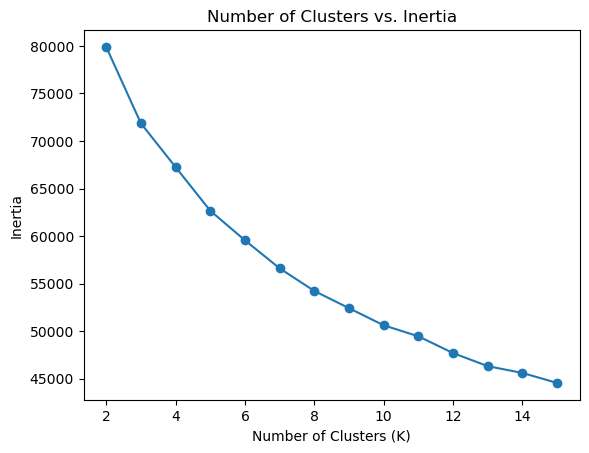

In [47]:
#plot the inertia values
import matplotlib.pyplot as plt

#turn the list into a series for plotting
inertia_series = pd.Series(inertia_values,index=range(2,16))

#plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

In [48]:
#looks like elbow is at 4

In [49]:
#lets fit a k means model with k =4

In [50]:
Kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
Kmeans4.fit(df_scaled_no_geo)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [54]:
print(Kmeans4.cluster_centers_.shape)
print(len(df_scaled_no_geo.columns))


(4, 10)
10


In [51]:
#check the number of custoemrs in each cluster

In [52]:
Counter(Kmeans4.labels_)

Counter({0: 4023, 2: 2524, 1: 2033, 3: 1420})

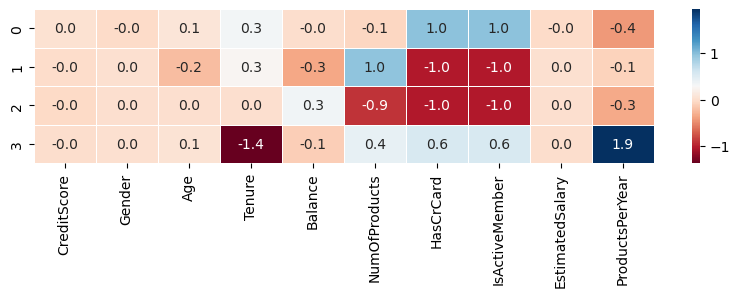

In [55]:
#create a heat map of the cluster centres
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers4 = pd.DataFrame(Kmeans4.cluster_centers_,columns=df_scaled_no_geo.columns)

plt.figure(figsize=(10,2))
sns.heatmap(cluster_centers4,annot=True,cmap="RdBu",fmt=".1f",linewidths=.5);

In [ ]:
#objective 4. explore the clusters and make recommendations.

In [ ]:
#createa da DataFrame that combines
#data set at the end of objective 1 (numeric data with newly engineered featured)

#exited field
#cluster labels from k means model at the ned of objective 3

#view the churn rate(% of custoemrs who exited) for each cluster
#view the country breakdown for each cluster
#make recomendation for how to cater to each customer segment

In [56]:
data_clean.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear
0,619,1,42.0,2,0.00,1,1,1,101348.88,1,0,0,0.500
1,608,1,41.0,1,83807.86,1,1,1,112542.58,0,0,1,1.000
2,502,1,42.0,8,159660.80,3,0,0,113931.57,1,0,0,0.375
3,699,1,39.0,1,0.00,2,0,0,93826.63,1,0,0,2.000
4,850,1,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0.500


In [57]:
churn_df.Exited.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [58]:
Kmeans4.labels_

array([0, 3, 1, ..., 0, 1, 2])

In [59]:
data_final=pd.concat([data_clean,churn_df.Exited,pd.Series(Kmeans4.labels_,name='Cluster')],axis=1)
data_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited,Cluster
0,619,1,42.0,2,0.00,1,1,1,101348.88,1,0,0,0.500,1,0
1,608,1,41.0,1,83807.86,1,1,1,112542.58,0,0,1,1.000,0,3
2,502,1,42.0,8,159660.80,3,0,0,113931.57,1,0,0,0.375,1,1
3,699,1,39.0,1,0.00,2,0,0,93826.63,1,0,0,2.000,0,3
4,850,1,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0.500,0,0


In [ ]:
#view exited percent for each cluster

In [60]:
data_final.groupby('Cluster').mean()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,ProductsPerYear,Exited
Cluster,,,,,,,,,,,,,,
0,653.812826,0.440467,39.757146,5.996271,76244.267855,1.494656,1.000000,1.000000,98785.426097,0.505593,0.237385,0.257022,0.292550,0.139945
1,648.710772,0.465814,36.656665,5.764879,54839.767442,2.085096,0.000000,0.000000,101487.833694,0.496311,0.235612,0.268077,0.462628,0.156419
2,647.043582,0.460380,39.098257,5.062599,98297.257322,1.001189,0.000000,0.000000,100898.224475,0.496830,0.285261,0.217908,0.333793,0.367274
3,650.022535,0.466197,39.482394,1.061268,69392.027190,1.776761,0.794366,0.794366,100363.993944,0.504930,0.250000,0.245070,1.496678,0.161268


In [ ]:
# View the geography breakdoiwn for each cluster

In [ ]:
# 0: Don't have a credit card
# 1:
# 2:
# 3: low tenure products peryear are high

In [ ]:
#recs
#0 : create an entry level credit card
#1 : ???? recheck : entice high balance customers to stay, seminar etc
#2 : ???  recheck : reward them for high tenure. french and spanish customers
#3 : encourage them to stay. 

In [ ]:
.228807